# Dataset
Kanker payudara adalah kanker yang paling umum terjadi pada wanita di dunia. Kanker ini menyumbang 25% dari semua kasus kanker, dan mempengaruhi lebih dari 2,1 Juta orang pada tahun 2015. Kanker ini bermula ketika sel-sel di payudara tumbuh secara tidak terkendali membentuk tumor yang dapat dilihat melalui sinar-X atau dirasakan sebagai benjolan di area payudara.

Salah satu tantangan utama dalam mendeteksi kanker payudara adalah mengklasifikasikan tumor sebagai ganas (kanker) atau jinak (non-kanker). Oleh karena itu, kami meminta Anda untuk menyelesaikan analisis klasifikasi tumor ini menggunakan pembelajaran mesin (dengan SVM) dan dataset Breast Cancer Wisconsin (Diagnostic).

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

# Data Loading
Data loading adalah proses memuat data dari sumber eksternal ke dalam aplikasi atau sistem komputer. Ini sering terjadi ketika kita ingin mengakses atau menggunakan data yang disimpan di file, basis data, API, atau sumber daya online lainnya.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Memuat dataset breast cancer dari scikit-learn
cancer = load_breast_cancer()

# Memisahkan fitur dan target
x = cancer.data     # Fitur (data)
y = cancer.target   # Target (label)

# Mengubah array fitur menjadi DataFrame
df_x = pd.DataFrame(x, columns=cancer.feature_names)
# Mengubah array target menjadi Series
df_y = pd.Series(y, name='target')

In [2]:
# Menggabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_x, df_y], axis=1)

# Menampilkan 5 baris pertama data
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

1. Output akan menampilkan 5 baris pertama dari DataFrame df.
2. Setiap baris merepresentasikan satu sampel dari dataset kanker payudara.
3. Kolom-kolomnya mencakup fitur numerik yang menggambarkan karakteristik sel kanker dan kolom target yang menunjukkan klasifikasinya.

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) adalah proses analisis data untuk memahami dataset yang akan digunakan sebelum dilakukan pemodelan atau pengambilan keputusan. Tujuan utama dari EDA adalah untuk menemukan pola, hubungan, dan insight dalam data, serta untuk mengeksplorasi karakteristik dan kemungkinan masalah yang ada pada data sebelum diproses lebih lanjut. EDA melibatkan penggunaan teknik visualisasi dan deskriptif untuk memahami dan menganalisis data secara sistematis. Dengan melakukan EDA, kita dapat mengidentifikasi outlier, memahami distribusi variabel, mengevaluasi korelasi antar variabel, dan mengeksplorasi hubungan antara variabel.

In [3]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

1. Dataset ini memiliki 569 sampel dan 31 kolom.
2. Semua kolom memiliki data lengkap tanpa nilai kosong.
3. Semua fitur memiliki nilai numerik, yang cocok untuk model machine learning.
4. Informasi ini berguna untuk memahami struktur data sebelum melakukan analisis lebih lanjut, seperti normalisasi atau pemodelan.

In [4]:
# Menampilkan nilai unik dari kolom target
df['target'].unique()

array([0, 1])

1. Dataset ini merupakan dataset klasifikasi biner karena hanya memiliki dua kelas (0 dan 1).
2. Nilai unik ini membantu dalam memahami struktur label target yang akan digunakan dalam model machine learning.

In [5]:
# Membuat DataFrame yang menggabungkan nama kategori dan jumlahnya
df_counts = pd.DataFrame({'target_name': cancer.target_names,'count': df['target'].value_counts().sort_index()})
print(df_counts)

       target_name  count
target                   
0        malignant    212
1           benign    357


Berdasarkan output terlihat bahwa 212 sampel dikategorikan sebagai malignant (ganas) dan 357 sampel dikategorikan sebagai benign (jinak)

In [6]:
# Menampilkan ringkasan statistik deskriptif
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

Output ini menampilkan ringkasan statistik untuk setiap fitur, termasuk:
- Mean (rata-rata)
- Standard deviation (standar deviasi)
- Minimum dan maksimum nilai. Dari statistik ini, kita dapat melihat rentang nilai dari setiap fitur.



In [7]:
# Mengecek apakah ada nilai yang hilang dalam dataset
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

1. Semua kolom memiliki nilai 0, yang berarti tidak ada nilai yang hilang dalam dataset ini.
2. Hal ini menunjukkan bahwa dataset sudah bersih, sehingga tidak perlu melakukan penanganan missing values seperti imputasi atau penghapusan baris/kolom.

In [8]:
# Mengecek duplikasi data
df.duplicated().sum()

0

1. Output = 0 berarti tidak ada baris yang duplikat dalam dataset.
2. Dataset ini bersih dan unik, sehingga tidak perlu menghapus baris duplikat.


In [9]:
# Menghitung matriks korelasi
correlation_table=df.corr()
correlation_table

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                     -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

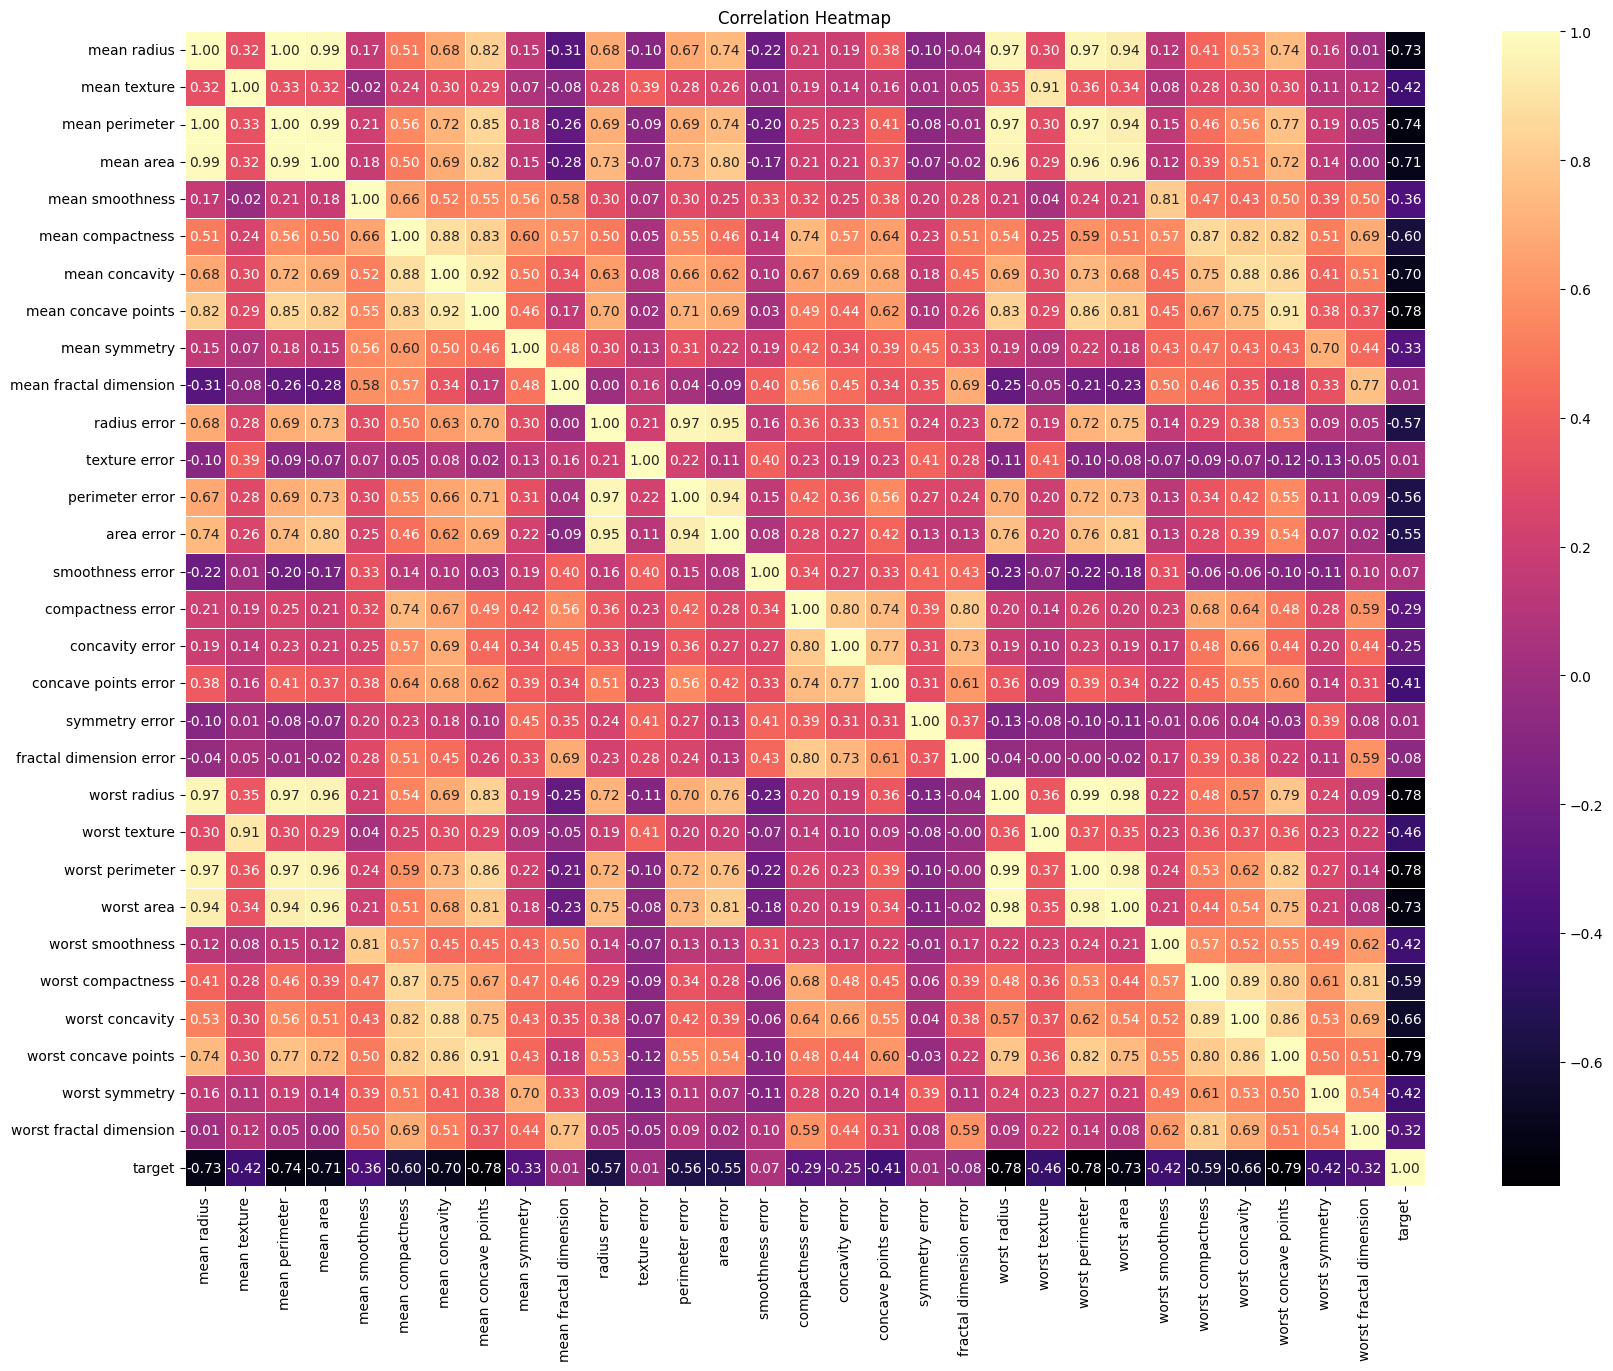

In [15]:
# Plot heatmap korelasi
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_table, annot=True, cmap="magma", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

1. Mean Radius vs Mean Perimeter memiliki korelasi sebesar 0.99. Artinya, semakin besar mean radius (rata-rata jari-jari tumor), semakin besar juga mean perimeter (keliling rata-rata tumor).
2. Mean Radius vs Mean Area memiliki korelasi sebesar 0.99. Artinya, semakin besar mean radius, semakin besar juga mean area (luas rata-rata tumor).
3.Target (Diagnosis) vs Worst Concave Points memiliki korelasi sebesar -0.79. Artinya, semakin banyak titik cekungan (concave points), semakin besar kemungkinan tumor tersebut ganas.
4. Mean Symmetry vs Target memiliki korelasi sebesar 0.01. Artinya, bentuk simetris atau tidaknya tumor bukanlah faktor utama dalam menentukan apakah kanker tersebut jinak atau ganas.

5 Fitur dengan korelasi tertinggi terhadap target: ['worst concave points', 'worst perimeter', 'mean concave points', 'worst radius', 'mean perimeter']


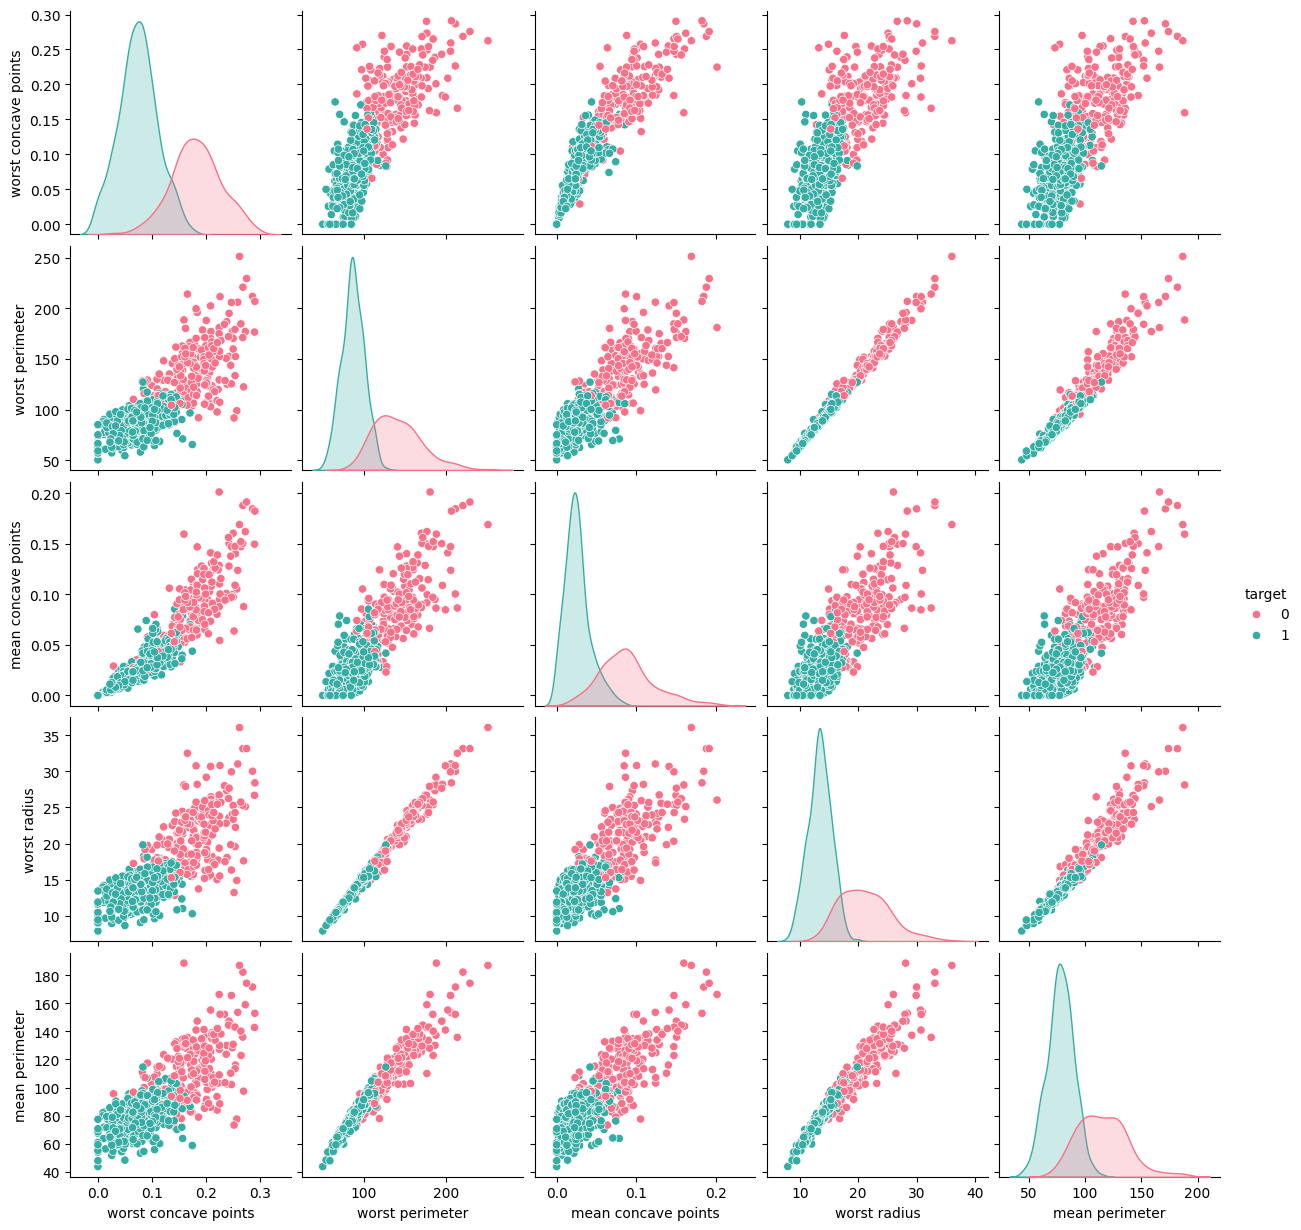

In [16]:
# Menghitung korelasi terhadap target
correlation_with_target = df.corr()['target'].abs().sort_values(ascending=False)

# Memilih 5 fitur dengan korelasi tertinggi (selain target)
top_5_features = correlation_with_target[1:6].index.tolist()  # Mengambil 5 fitur teratas

# Menampilkan fitur yang dipilih
print("5 Fitur dengan korelasi tertinggi terhadap target:", top_5_features)

# Membuat pairplot untuk 5 fitur terpilih
sns.pairplot(df, vars=top_5_features, hue='target', palette='husl')
plt.show()

Gambar tersebut merupakan pair plot, yang sering digunakan untuk melihat hubungan antara beberapa variabel dalam suatu dataset. Pair plot ini menampilkan distribusi dan hubungan antara fitur-fitur yang digunakan dalam klasifikasi kanker, dengan warna yang menunjukkan perbedaan antara dua kelas target (kanker ganas dan jinak).
1. Terlihat bahwa kelas 1 (tumor jinak) memiliki distribusi nilai yang lebih tinggi dibandingkan kelas 0 (tumor ganas).
2. Pada scatter plot, sebagian besar pasangan fitur menunjukkan korelasi positif yang kuat. Ini berarti bahwa ketika satu fitur meningkat (misalnya mean perimeter) fitur lain yang berkaitan (seperti worst perimeter) juga meningkat.
Korelasi tinggi menunjukkan bahwa fitur-fitur ini memiliki hubungan linier yang berguna untuk model prediktif berbasis klasifikasi.


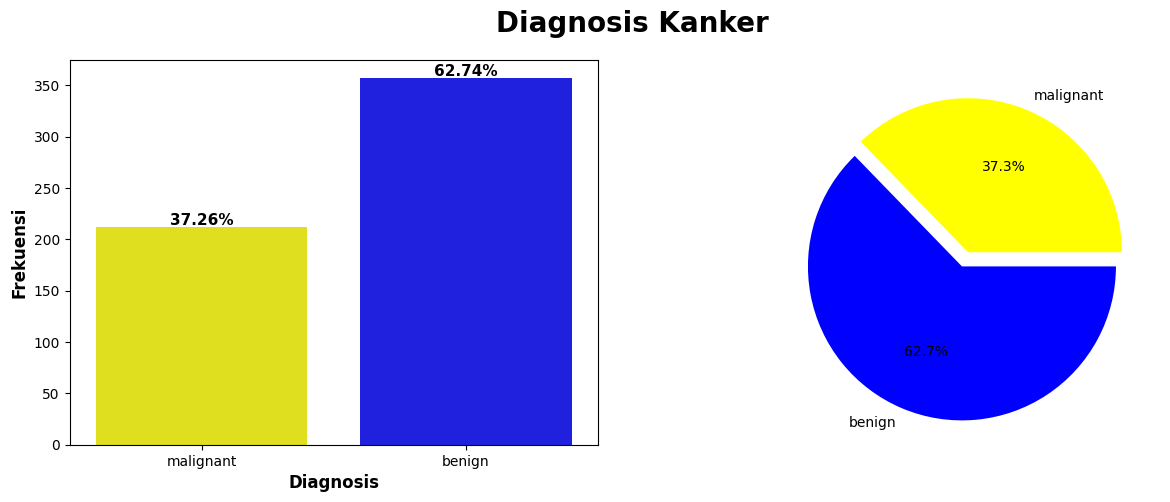

In [17]:
# Pastikan target_counts diurutkan berdasarkan index agar urutannya konsisten (0, 1)
target_counts = df['target'].value_counts().sort_index()

# Tentukan palet warna berdasarkan nilai frekuensi:
# Jika frekuensi kategori pertama lebih kecil, maka warna kuning untuk kategori 0 dan biru untuk kategori 1.
palette = ["yellow", "blue"]

# Menyesuaikan ukuran figure
plt.figure(figsize=(15, 5))

# Membuat countplot untuk kolom target
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="target", order=target_counts.index, hue="target",
              palette=palette, legend=False)
plt.xlabel("Diagnosis", fontsize=12, weight="bold")
plt.ylabel("Frekuensi", fontsize=12, weight="bold")
plt.xticks(ticks=[0, 1], labels=cancer.target_names)

# Menambahkan persentase di atas batang
for i in range(len(target_counts)):
    percentage = round(target_counts.values[i] * 100 / len(df), 2)
    text = f"{percentage}%"
    plt.text(x=i, y=target_counts.values[i] + 2, ha="center", s=text, fontsize=11, weight="bold")

# Membuat pie chart
plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=cancer.target_names, explode=[0, 0.1],
        autopct='%1.1f%%', colors=palette)

# Menambahkan judul
plt.suptitle("Diagnosis Kanker", fontsize=20, color='black', weight="bold")

# Menampilkan plot
plt.show()

Dataset menunjukkan bahwa lebih banyak pasien yang didiagnosis dengan kanker jinak (benign) dibandingkan dengan kanker ganas (malignant). Dari total 569 sampel, sekitar 357 sampel (62.7%) adalah kanker jinak, sedangkan 212 sampel (37.3%) adalah kanker ganas.

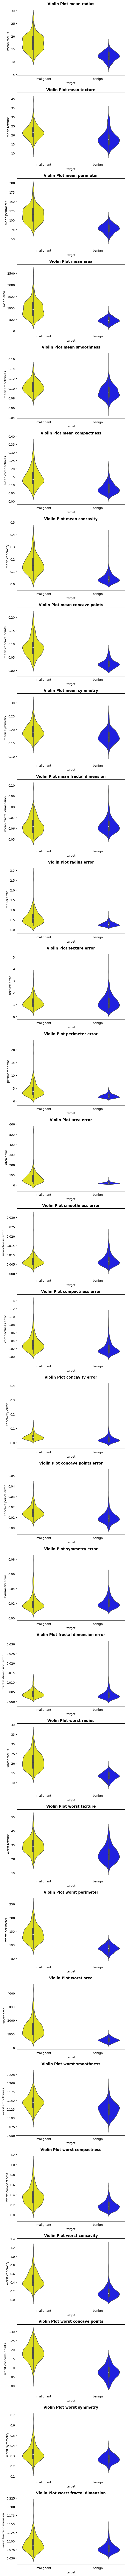

In [18]:
# Ambil semua fitur numerik kecuali kolom 'target'
features = df.columns.drop('target')
n_features = len(features)

# Tentukan grid subplot: 1 kolom, satu baris per fitur
n_cols = 1
n_rows = n_features

# Buat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 4 * n_rows))
if n_features == 1:
    axes = [axes]

# Loop untuk setiap fitur dan buat violin plot penuh untuk tiap target
for i, feature in enumerate(features):
    sns.violinplot(
        ax=axes[i],
        x='target',
        y=feature,
        data=df,
        hue='target',          # Memasukkan target sebagai hue
        palette=palette,       # Menggunakan palet yang sudah didefinisikan (misal: ["yellow", "blue"])
        split=False,           # Menampilkan violin penuh (tidak terbelah)
        dodge=True,            # Menampilkan violin secara berdampingan
        legend=False           # Nonaktifkan legend (karena label sudah diubah)
    )
    # Atur tick dan label sumbu x
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(cancer.target_names)
    # Tambahkan judul untuk setiap subplot
    axes[i].set_title(f"Violin Plot {feature}", fontsize=12, weight="bold")

plt.tight_layout()
plt.show()

Violin plot adalah kombinasi antara boxplot dan kernel density estimation (KDE), yang menunjukkan distribusi data berdasarkan nilai median, kuartil, serta kepadatannya.
- Bagian lebar berarti lebih banyak data (lebih sering muncul).
- Bagian sempit berarti lebih sedikit data.
- Garis di tengah violin menunjukkan median dan kuartil data.

Fitur yang berkaitan dengan ukuran tumor (seperti radius, perimeter, dan area) memiliki perbedaan distribusi yang jelas antara kanker ganas dan jinak. Ini menunjukkan bahwa ukuran tumor merupakan faktor penting dalam membedakan jenis kanker payudara.

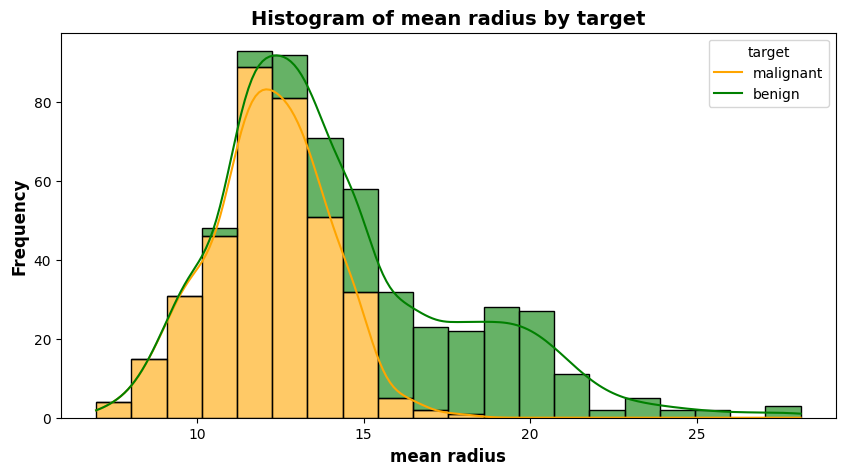

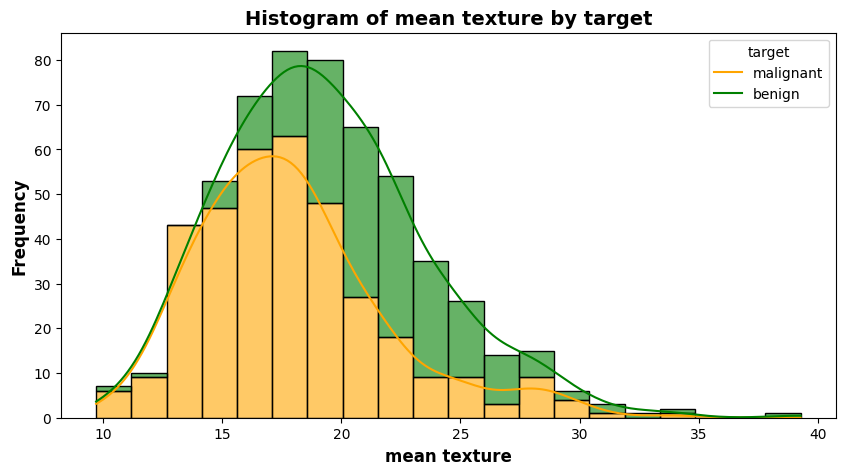

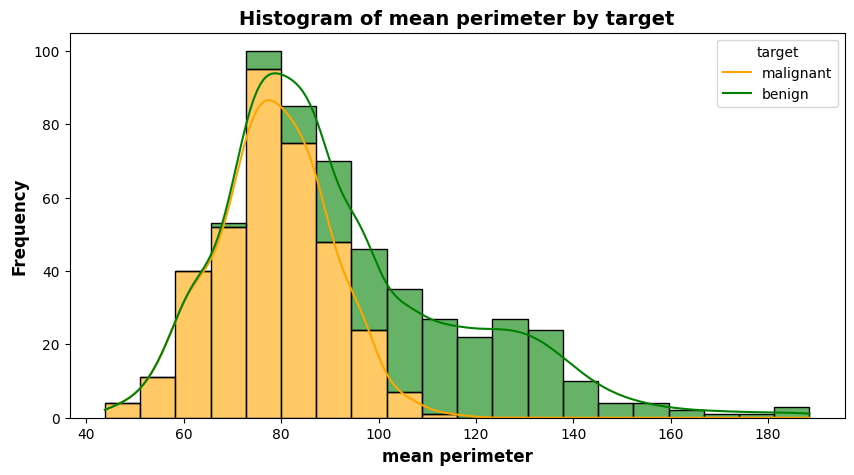

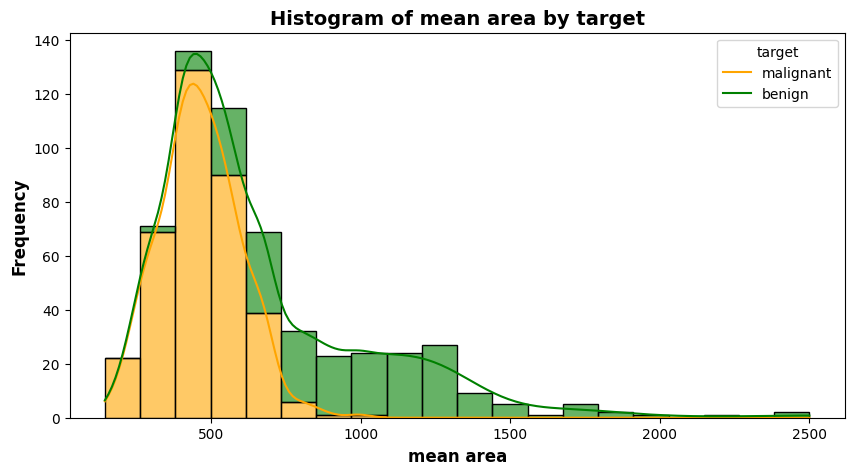

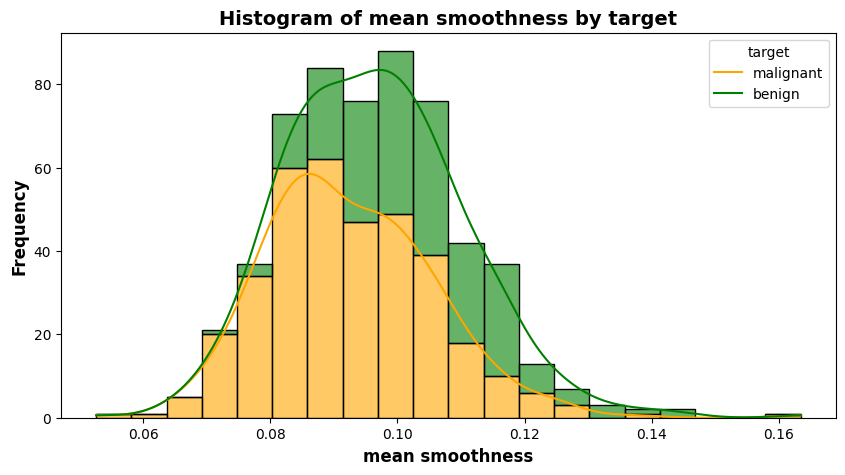

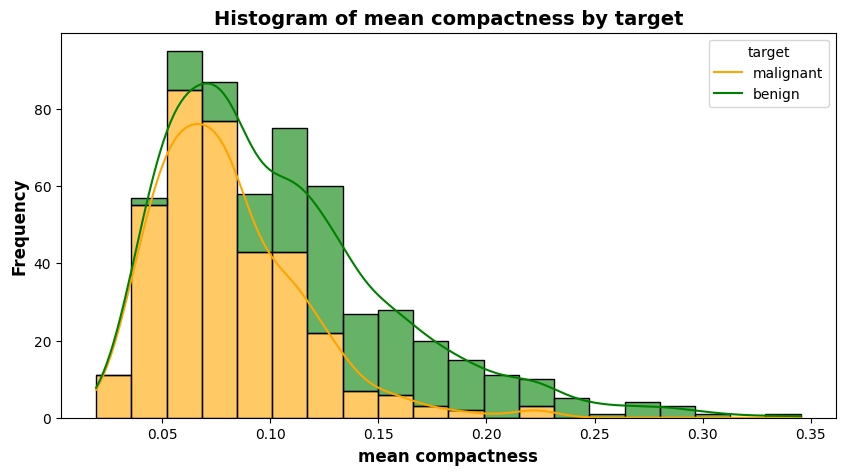

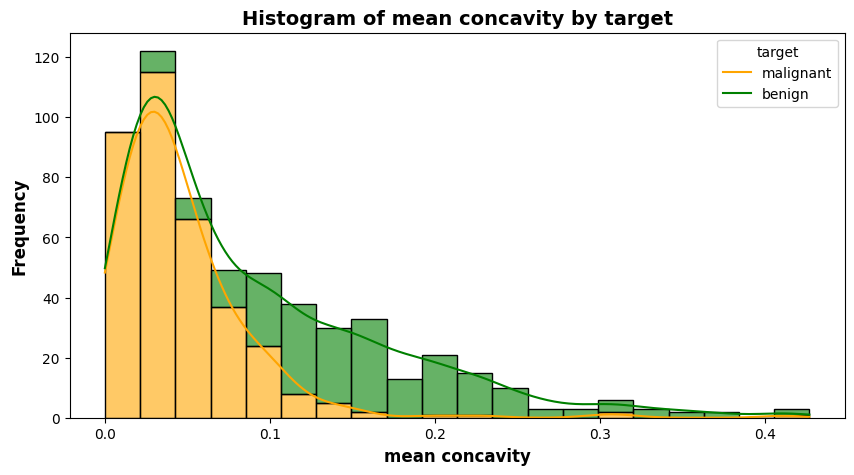

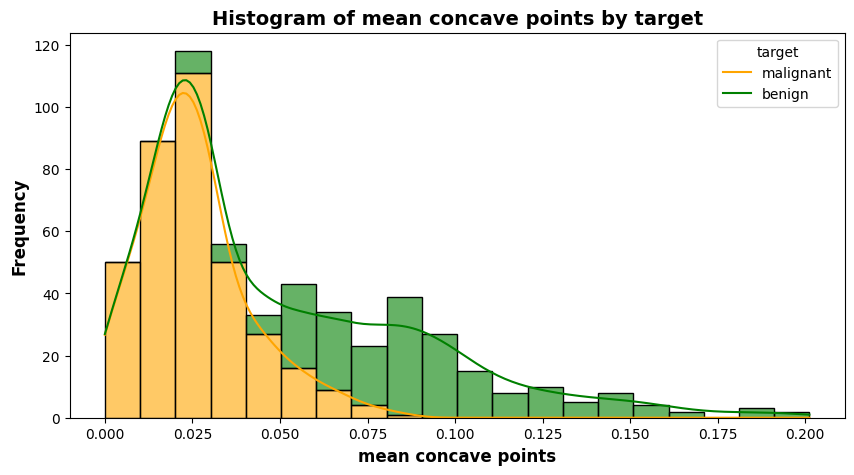

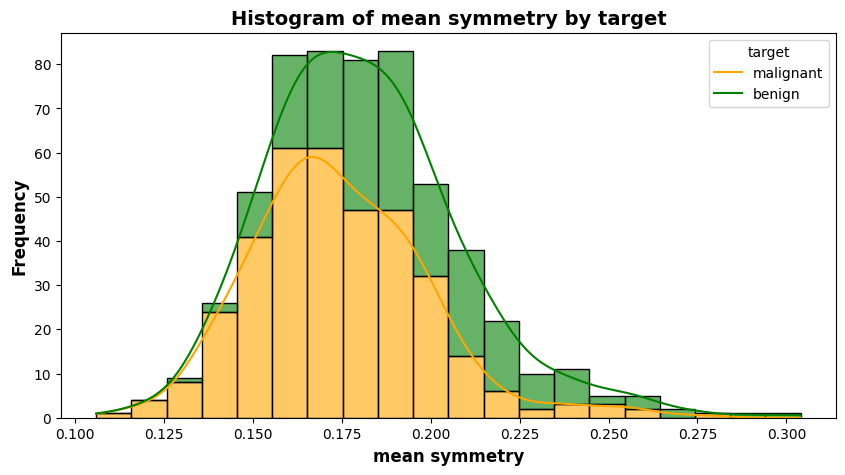

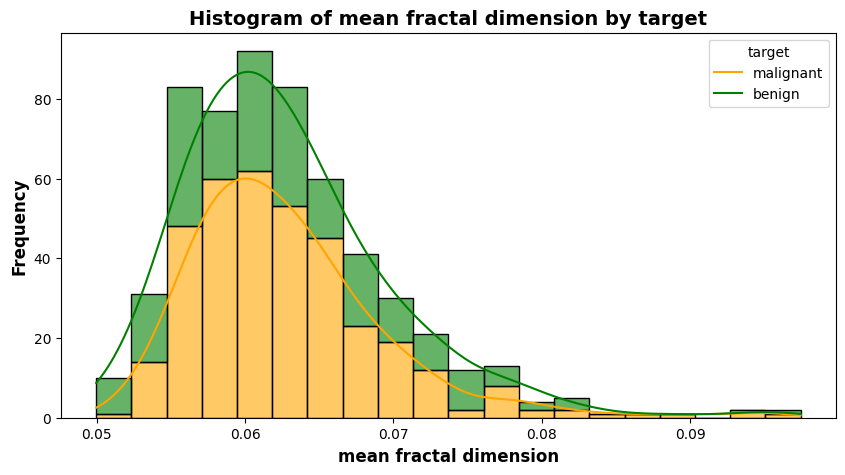

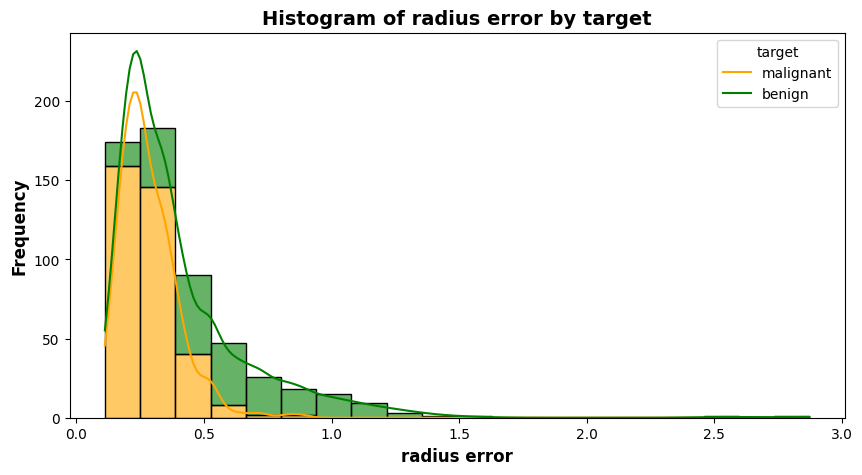

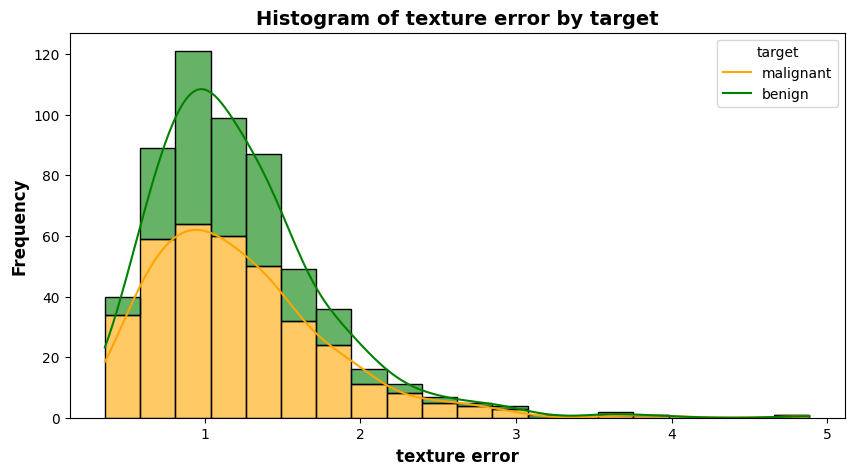

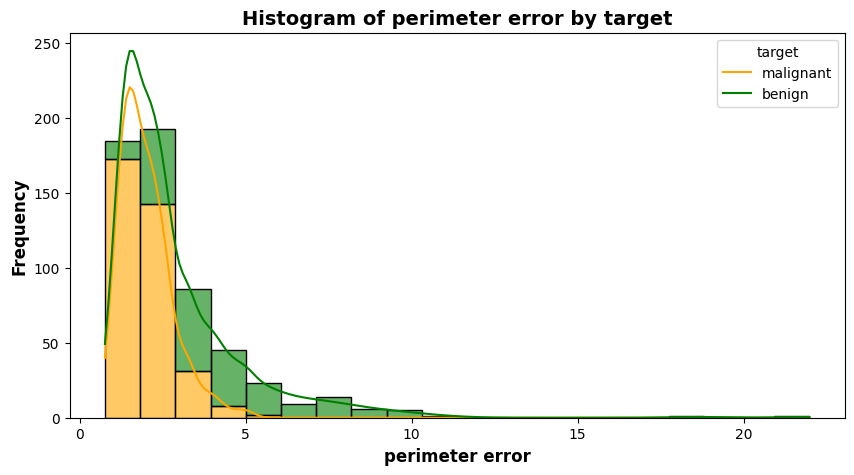

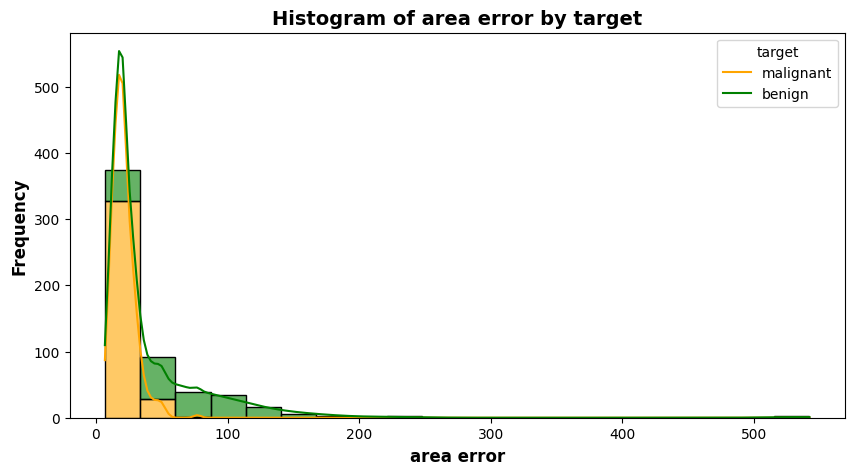

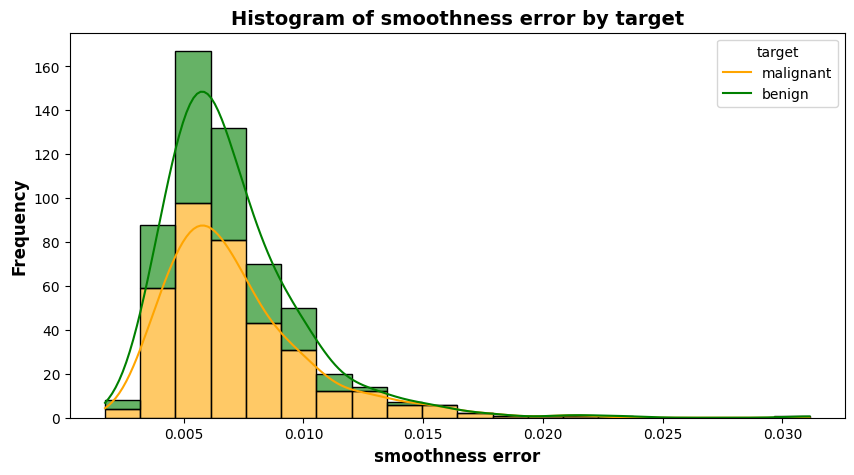

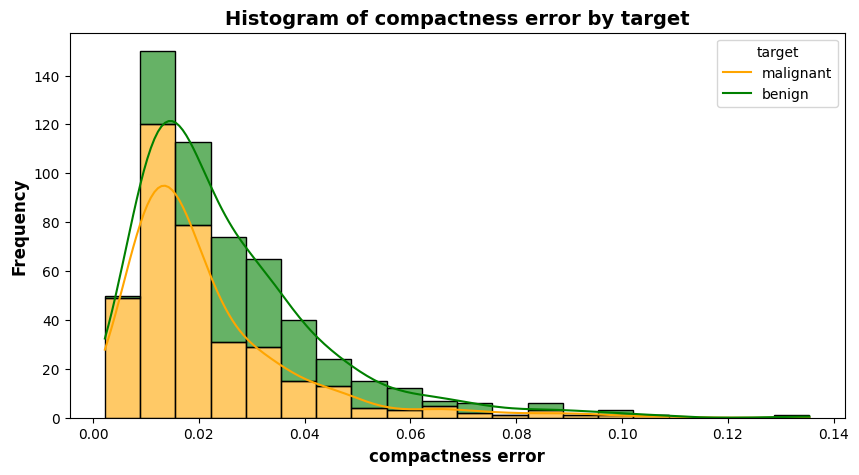

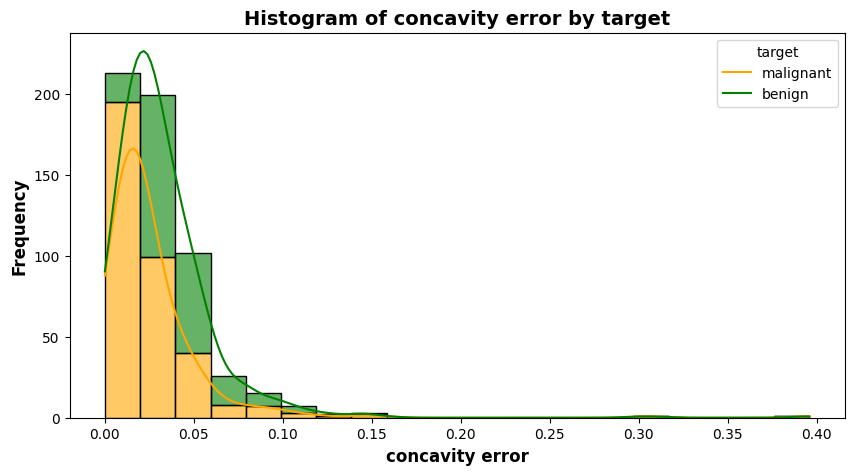

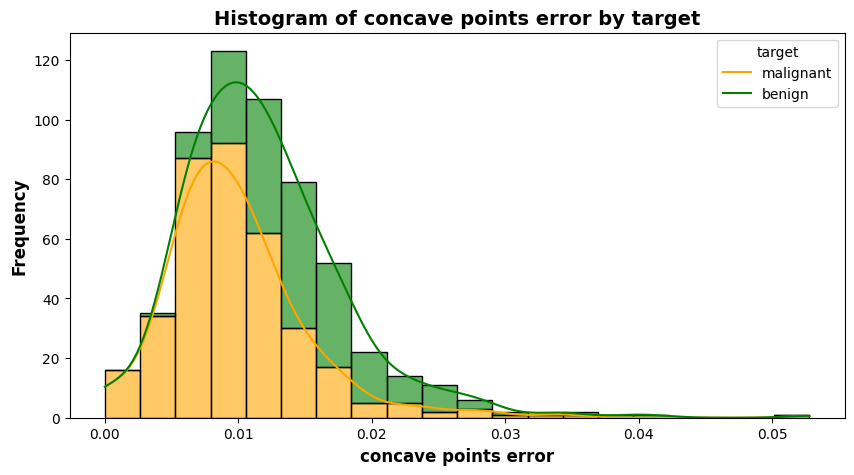

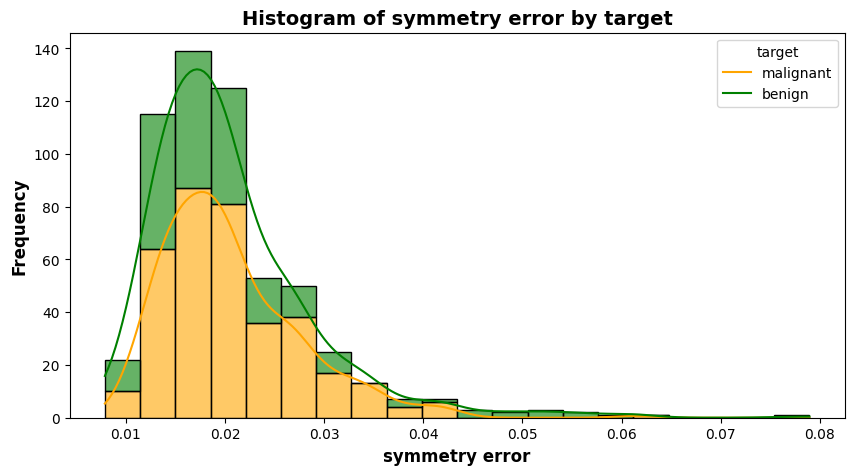

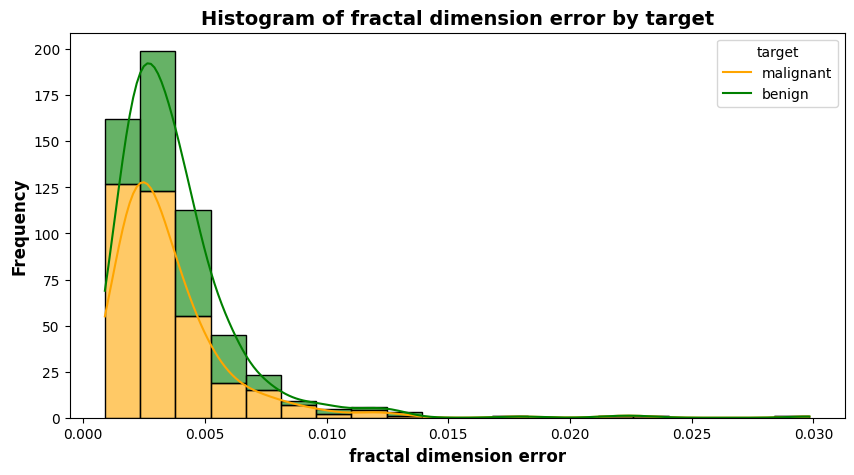

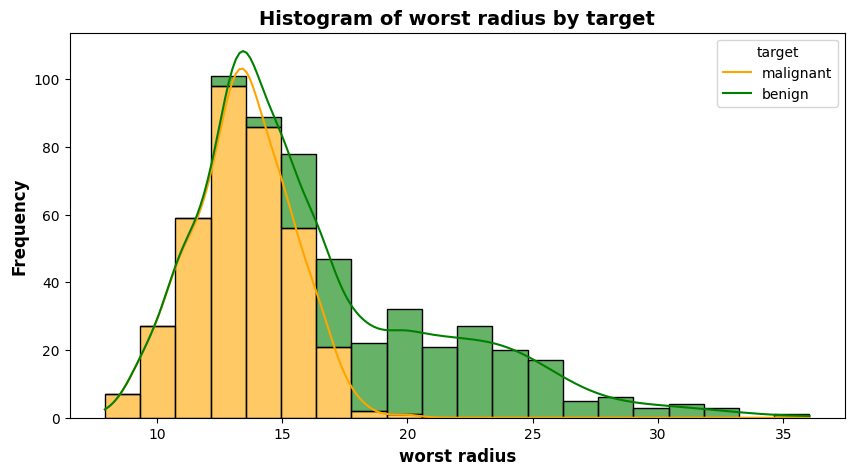

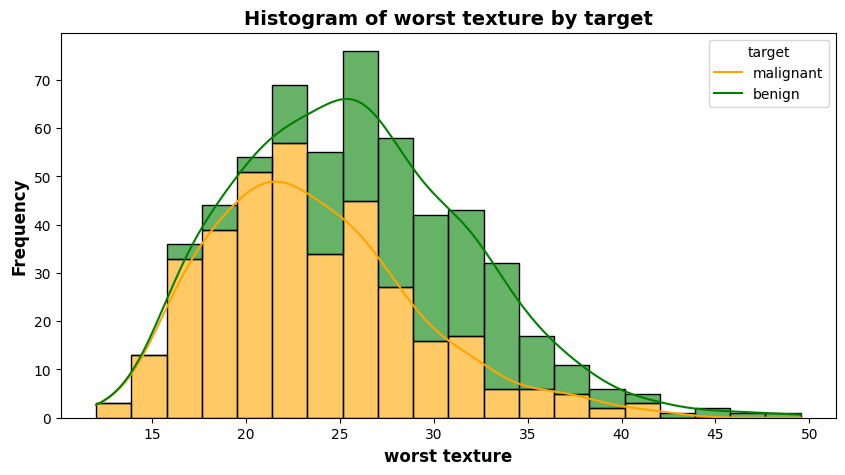

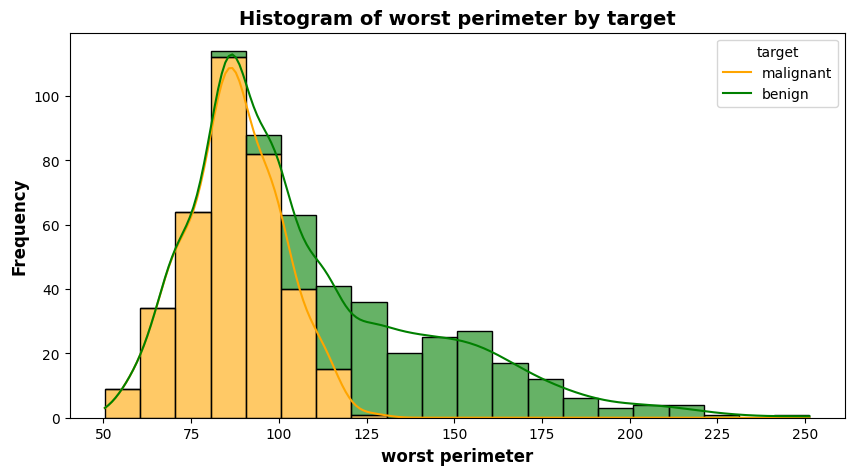

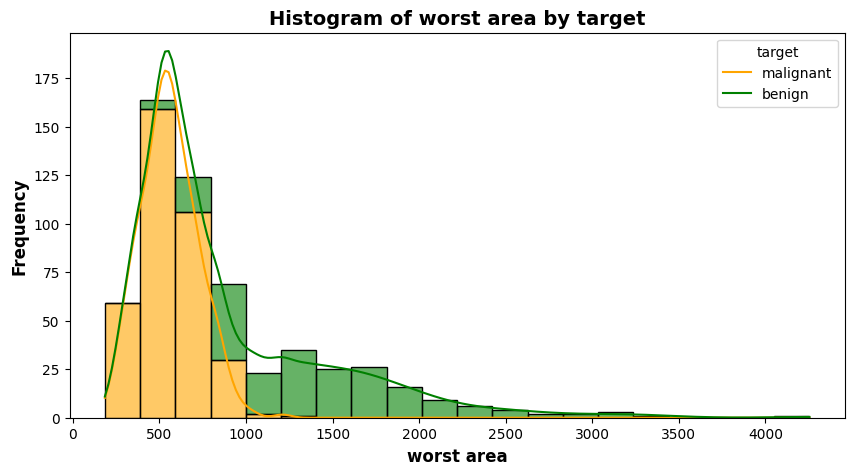

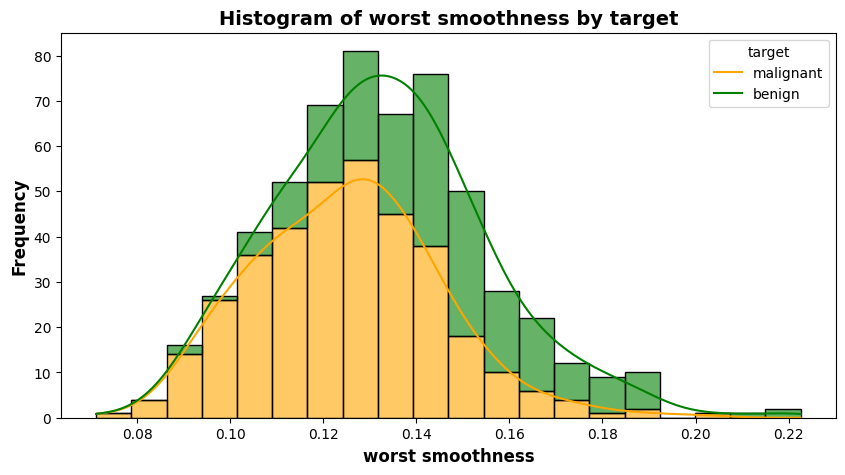

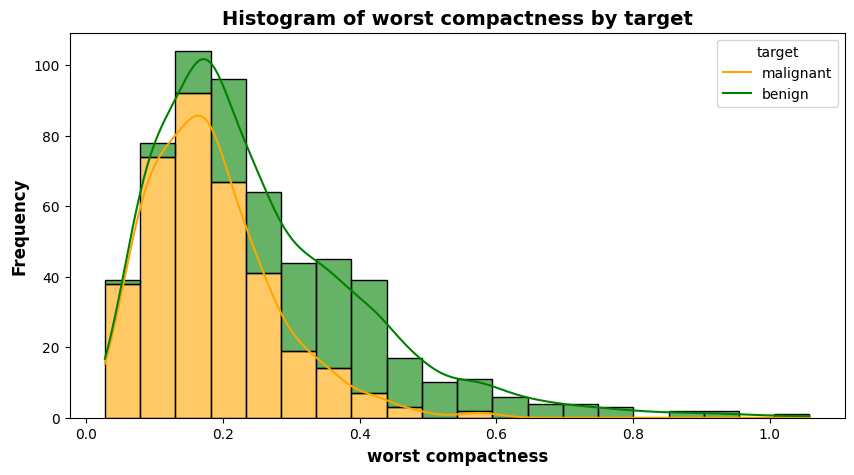

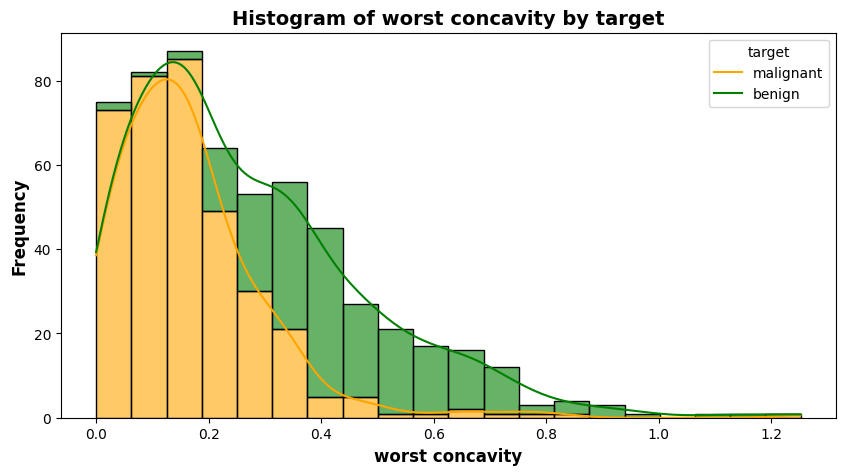

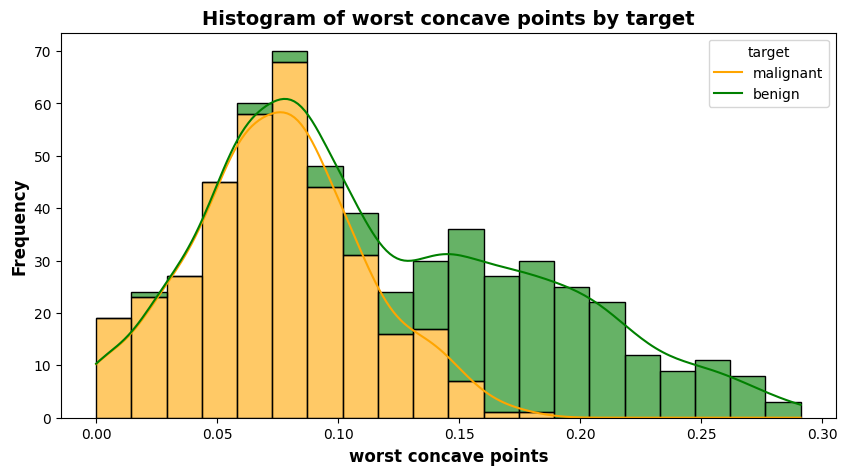

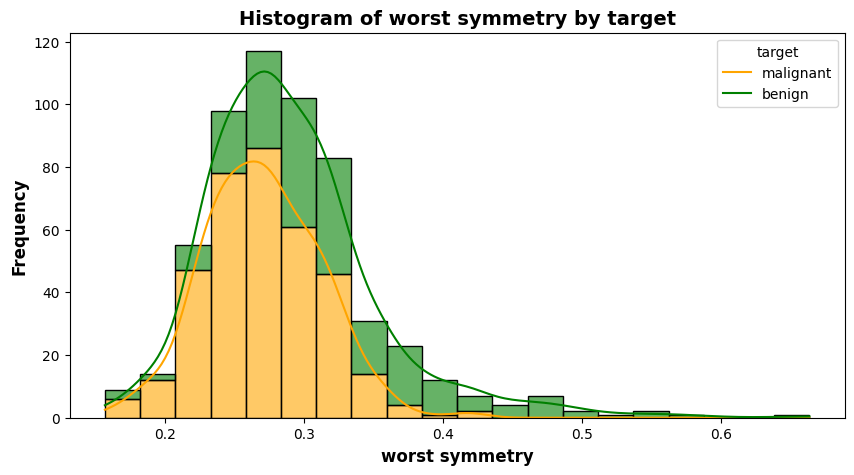

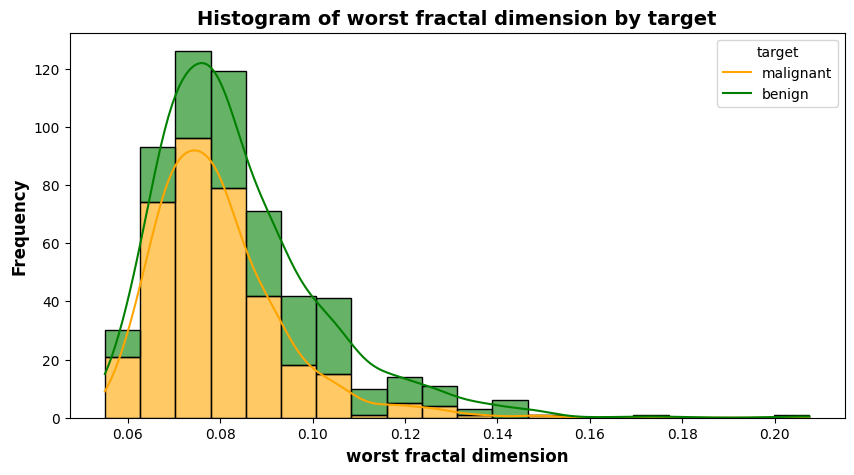

In [19]:
# Mendapatkan daftar fitur numerik tanpa kolom target
numerical_features = df.select_dtypes(exclude=['object']).columns.drop('target')

# Fungsi untuk membuat histogram setiap fitur terhadap target dengan warna biru dan kuning
def plot_feature_vs_target(df, feature, target):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue=str(target), bins=20, kde=True,
                 palette=['green', 'orange'], alpha=0.6, multiple="stack")

    plt.xlabel(feature, fontsize=12, weight="bold")
    plt.ylabel("Frequency", fontsize=12, weight="bold")
    plt.title(f"Histogram of {feature} by {target}", fontsize=14, weight="bold")
    plt.legend(title=target, labels=cancer.target_names)

    plt.show()

# Loop untuk setiap fitur numerik dan buat histogram terhadap target
for feature in numerical_features:
    plot_feature_vs_target(df, feature, 'target')

Outputnya berupa grafik histogram yang menunjukkan distribusi nilai setiap fitur numerik, dengan perbedaan warna berdasarkan kelas "target". Ini membantu melihat bagaimana distribusi setiap fitur berkaitan dengan target.

Misalnya dari Histogram of Mean Radius by Target:
- Kanker jinak (hijau) memiliki mean radius lebih besar dibanding kanker ganas (orange).
- Garis hijau dan oranye menunjukkan pola kepadatan data.
- Kanker jinak memiliki puncak distribusi yang lebih tinggi dibanding kanker ganas, karena jumlahnya lebih banyak dalam dataset.
- Ada tumpang tindih di sekitar mean radius 12-15 yang menunjukkan bahwa beberapa tumor jinak dan ganas memiliki ukuran yang mirip.


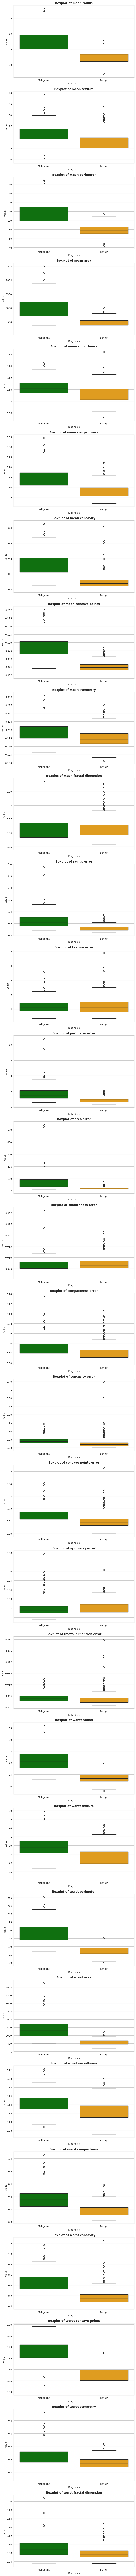

In [20]:
# Konversi DataFrame ke format long (melted)
df_melted = df.melt(id_vars=['target'], var_name='features', value_name='value')

# Ganti nilai numerik target menjadi label diagnosis
df_melted['diagnosis'] = df_melted['target'].map({0: 'Malignant', 1: 'Benign'})

# Set style
plt.style.use('ggplot')
sns.set_style('whitegrid')

# Mendapatkan daftar fitur unik
unique_features = df_melted['features'].unique()

# Membuat subplot untuk setiap fitur
n_features = len(unique_features)
fig, axes = plt.subplots(nrows=n_features, figsize=(8, 5 * n_features))

# Jika hanya satu fitur, pastikan `axes` dalam bentuk list
if n_features == 1:
    axes = [axes]

# Looping untuk setiap fitur dan membuat boxplot dengan warna hijau & oranye
for i, feature in enumerate(unique_features):
    ax = axes[i]
    sns.boxplot(x="diagnosis", y="value", hue="diagnosis",
                data=df_melted[df_melted['features'] == feature],
                palette=['green', 'orange'], legend=False, ax=ax)

    ax.set_title(f"Boxplot of {feature}", fontsize=12, weight="bold")
    ax.set_xlabel("Diagnosis", fontsize=10)
    ax.set_ylabel("Value", fontsize=10)

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

- Beberapa fitur dalam dataset memiliki outlier, menunjukkan adanya nilai ekstrem yang perlu diperhatikan.
- Sebaran data kanker ganas pada beberapa fitur cenderung lebih luas dibandingkan kanker jinak, menandakan bahwa karakteristik kanker ganas lebih beragam. Sedangkan, kanker jinak memiliki sebaran data yang lebih sempit, menunjukkan bahwa karakteristiknya lebih seragam. .
- Nilai median pada kelompok kanker ganas lebih tinggi dibandingkan dengan kelompok kanker jinak.



In [23]:
# Fungsi untuk mengganti outlier dengan median
def replace_outliers_with_median(df, features):
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        # Batas bawah dan atas
        lower_bound = Q1 - outlier_step
        upper_bound = Q3 + outlier_step

        # Ganti outlier dengan median
        median_value = df[col].median()
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])

    return df

# List fitur numerik tanpa target
numerical_features = df.columns.drop('target')

# Terapkan fungsi
df_cleaned = replace_outliers_with_median(df.copy(), numerical_features)
df_cleaned

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.09587   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00      551.1          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.09587   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.09263         0.06154              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.09263         0.24140              0.10520         0.1792   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.09263         0.06154              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60       686.5   
1                   0.05667  ...          23.41           158.80       686.5   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.06154  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10       686.5   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.21190           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.13130            0.21190           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.21190           0.2267   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.2822                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.2822                  0.08004       0  
4                  0.1625          0.2364                  0.076

# Memisahkan Data Training dan Testing

Memisahkan Data Training dan Testing adalah proses membagi dataset menjadi dua bagian:
1.   Training Set (Data Latihan):
- Biasanya 80% dari data digunakan untuk melatih model.
- Model akan belajar dari data ini dengan mengenali pola yang ada.
2.   Testing Set (Data Uji):
- Sisanya 20% dari data digunakan untuk mengukur performa model.
- Model diuji pada data ini yang tidak pernah dilihat sebelumnya, sehingga bisa diketahui apakah model bekerja dengan baik atau tidak.

In [24]:
# Pisahkan fitur (X) dan target (y)
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

# Membagi data menjadi training dan testing (misalnya, 80% training dan 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi Data (Feature Scaling)
Normalisasi adalah salah satu tahap dalam pre-processing data. Normalisasi melibatkan penyesuaian skala atau rentang data numerik sehingga memiliki nilai yang seragam atau normal. Tujuan normalisasi adalah untuk menghilangkan perbedaan skala antara fitur numerik dalam dataset, yang dapat mempengaruhi kinerja model atau analisis.

In [25]:
# Normalisasi fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi hasil normalisasi ke DataFrame agar lebih mudah dibaca
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.095170      0.376111        0.109378   0.069315         0.629048   
1     0.953055      0.832182        0.953713   0.987020         0.736054   
2     0.105413      0.204837        0.113504   0.078314         0.209730   
3     0.210470      0.765548        0.202153   0.152821         0.485947   
4     0.176328      0.255183        0.167337   0.122447         0.726066   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.585535        0.225174             0.290891       0.730650   
1          0.351791        0.909989             0.994681       0.950464   
2          0.327202        0.219100             0.144947       0.908669   
3          0.254346        0.087047             0.107380       0.565015   
4          0.294064        0.039663             0.085771       0.483746   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.402783  ...      0.087544       0.357191         0.083214   
1                0.835478  ...      0.965669       0.721102         0.922153   
2                0.684174  ...      0.071452       0.242272         0.083894   
3                0.463652  ...      0.191610       0.778562         0.177538   
4                0.683130  ...      0.125630       0.182460         0.116167   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.059144          0.625409           0.684973         0.293387   
1    0.270797          0.633816           0.309017         0.877443   
2    0.050603          0.159832           0.235199         0.180795   
3    0.135779          0.641289           0.188330         0.145593   
4    0.084825          0.432041           0.119466         0.028057   

   worst concave points  worst symmetry  worst fractal dimension  
0              0.601375        0.485516                 0.954170  
1              0.997595        0.978370                 0.381913  
2              0.174811        0.663190                 0.456156  
3              0.210859        0.712244                 0.403758  
4              0.088625        0.769409                 0.384357  

[5 rows x 30 columns]

Output tersebut menunjukkan bahwa dataset berada dalam rentang 0 hingga 1. Ini memastikan bahwa semua fitur memiliki skala yang seragam, sehingga tidak ada fitur yang mendominasi perhitungan akibat perbedaan skala. Dengan demikian, algoritma machine learning dapat bekerja lebih optimal, terutama yang sensitif terhadap perbedaan skala seperti k-NN dan SVM.

# Membangun Model Machine Learning
Membangun model machine learning berarti melatih algoritma untuk mempelajari pola dalam data dan membuat prediksi berdasarkan data baru. Proses ini mencakup pemilihan algoritma, pelatihan model, serta evaluasi hasilnya guna menentukan metode yang paling akurat.

Pada tahap ini, kita akan menguji berbagai metode klasifikasi, seperti Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, Naive Bayes, K-Nearest Neighbors. Dengan membandingkan performa masing-masing metode, kita dapat menentukan algoritma yang memberikan akurasi tertinggi dan hasil yang paling dapat diandalkan dalam memprediksi data.

##**Logistic Regression**

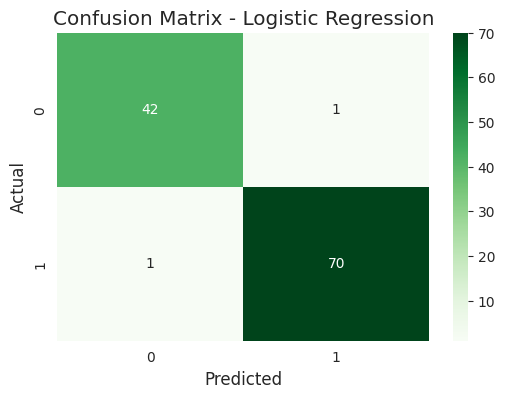

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [26]:
# Membuat dan melatih model Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set pengujian
y_pred = model.predict(X_test_scaled)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report
report = classification_report(y_test, y_pred)
print('Classification Report - Logistic Regression:')
print(report)

Confusion Matrix:
- True Positives (TP): Model berhasil mengklasifikasikan 70 kasus kanker jinak dengan benar.
- True Negatives (TN): Model berhasil mengklasifikasikan 42 kasus kanker ganas dengan benar.
- False Positives (FP): Sebanyak 1 kasus kanker ganas salah diklasifikasikan sebagai kanker jinak.
- False Negatives (FN): Sebanyak 1 kasus kanker jinak salah diklasifikasikan sebagai kanker ganas.

Dari total 43 kasus kanker ganas (TN + FP = 42 + 1 = 43), model salah mengklasifikasikan 1 kasus sebagai kanker jinak (FP). Sementara itu, dari 71 kasus kanker jinak (FN + TP = 1 + 70 = 71), model salah mengklasifikasikan 1 kasus sebagai kanker ganas (FN).

Classification Report:

Precision: Mengukur tingkat ketepatan model dalam memprediksi kelas positif (kanker jinak).
- Untuk kelas 0 (kanker ganas), precision sebesar 0.98, yang berarti sekitar 98% dari kasus yang diprediksi sebagai kanker ganas memang benar kanker ganas.
- Untuk kelas 1 (kanker jinak), precision sebesar 0.99, yang berarti sekitar 99% dari kasus yang diprediksi sebagai kanker jinak memang benar kanker jinak.

Recall: Mengukur kemampuan model dalam mengidentifikasi dengan benar kasus kanker dalam dataset.
- Recall untuk kelas 0 (kanker ganas) sebesar 0.98, menunjukkan bahwa model mampu mengidentifikasi sekitar 98% dari seluruh kasus kanker ganas yang ada.
- Recall untuk kelas 1 (kanker jinak) sebesar 0.99, menunjukkan bahwa model mampu mengidentifikasi sekitar 99% dari seluruh kasus kanker jinak yang ada.

F1-score: Metrik yang menggabungkan precision dan recall menjadi satu angka yang mencerminkan keseimbangan antara keduanya.
- F1-score untuk kelas 0 adalah 0.98
- F1-score untuk kelas 1 adalah 0.99.

Accuracy: Persentase keseluruhan dari prediksi yang benar dibandingkan dengan total jumlah data. Model ini memiliki akurasi sebesar 0.98, yang berarti model mampu memberikan prediksi yang benar sebanyak 98% dari seluruh dataset.


##**Decision Tree**

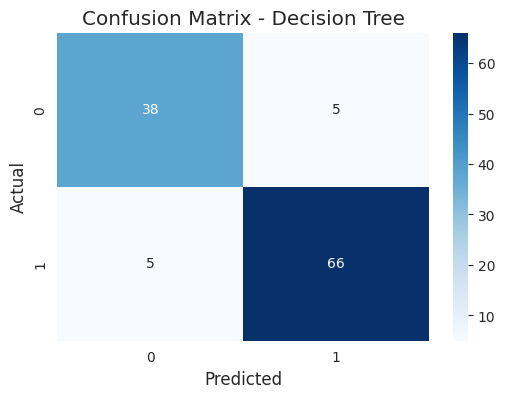

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        43
           1       0.93      0.93      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [27]:
# Membuat dan melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set pengujian
y_pred_dt = dt_model.predict(X_test_scaled)

# Membuat confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report
report_dt = classification_report(y_test, y_pred_dt)
print('Classification Report - Decision Tree:')
print(report_dt)

Confusion Matrix:
- True Positives (TP): Model berhasil mengklasifikasikan 66 kasus kanker jinak dengan benar.
- True Negatives (TN): Model berhasil mengklasifikasikan 38 kasus kanker ganas dengan benar.
- False Positives (FP): Sebanyak 5 kasus kanker ganas salah diklasifikasikan sebagai kanker jinak.
- False Negatives (FN): Sebanyak 5 kasus kanker jinak salah diklasifikasikan sebagai kanker ganas.

Dari total 43 kasus kanker ganas (TN + FP = 38 + 5 = 43), model salah mengklasifikasikan 5 kasus sebagai kanker jinak (FP). Sementara itu, dari 71 kasus kanker jinak (FN + TP = 5 + 66 = 71), model salah mengklasifikasikan 5 kasus sebagai kanker ganas (FN).

Classification Report:

Precision: Mengukur tingkat ketepatan model dalam memprediksi kelas positif (kanker jinak).
- Untuk kelas 0 (kanker ganas), precision sebesar 0.88, yang berarti sekitar 88% dari kasus yang diprediksi sebagai kanker ganas memang benar kanker ganas.
- Untuk kelas 1 (kanker jinak), precision sebesar 0.93, yang berarti sekitar 93% dari kasus yang diprediksi sebagai kanker jinak memang benar kanker jinak.

Recall: Mengukur kemampuan model dalam mengidentifikasi dengan benar kasus kanker dalam dataset.
- Recall untuk kelas 0 (kanker ganas) sebesar 0.88, menunjukkan bahwa model mampu mengidentifikasi sekitar 88% dari seluruh kasus kanker ganas yang ada.
- Recall untuk kelas 1 (kanker jinak) sebesar 0.93, menunjukkan bahwa model mampu mengidentifikasi sekitar 93% dari seluruh kasus kanker jinak yang ada.

F1-score: Metrik yang menggabungkan precision dan recall menjadi satu angka yang mencerminkan keseimbangan antara keduanya.
- F1-score untuk kelas 0 adalah 0.88
- F1-score untuk kelas 1 adalah 0.93

Accuracy: Persentase keseluruhan dari prediksi yang benar dibandingkan dengan total jumlah data. Model ini memiliki akurasi sebesar 0.91, yang berarti model mampu memberikan prediksi yang benar sebanyak 91% dari seluruh dataset.


##**Random Forest**

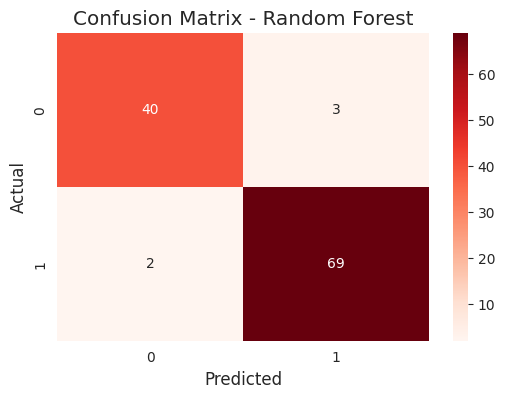

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [28]:
# Membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set pengujian
y_pred_rf = rf_model.predict(X_test_scaled)

# Membuat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix untuk Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report untuk Random Forest
report_rf = classification_report(y_test, y_pred_rf)
print('Classification Report - Random Forest:')
print(report_rf)

Confusion Matrix:
- True Positives (TP): Model berhasil mengklasifikasikan 69 kasus kanker jinak dengan benar.
- True Negatives (TN): Model berhasil mengklasifikasikan 40 kasus kanker ganas dengan benar.
- False Positives (FP): Sebanyak 3 kasus kanker ganas salah diklasifikasikan sebagai kanker jinak.
- False Negatives (FN): Sebanyak 2 kasus kanker jinak salah diklasifikasikan sebagai kanker ganas.

Dari total 43 kasus kanker ganas (TN + FP = 40 + 3 = 43), model salah mengklasifikasikan 3 kasus sebagai kanker jinak (FP). Sementara itu, dari 71 kasus kanker jinak (FN + TP = 2 + 69 = 71), model salah mengklasifikasikan 2 kasus sebagai kanker ganas (FN).

Classification Report:

Precision: Mengukur tingkat ketepatan model dalam memprediksi kelas positif (kanker jinak).
- Untuk kelas 0 (kanker ganas), precision sebesar 0.95, yang berarti sekitar 95% dari kasus yang diprediksi sebagai kanker ganas memang benar kanker ganas.
- Untuk kelas 1 (kanker jinak), precision sebesar 0.96, yang berarti sekitar 96% dari kasus yang diprediksi sebagai kanker jinak memang benar kanker jinak.

Recall: Mengukur kemampuan model dalam mengidentifikasi dengan benar kasus kanker dalam dataset.
- Recall untuk kelas 0 (kanker ganas) sebesar 0.93, menunjukkan bahwa model mampu mengidentifikasi sekitar 93% dari seluruh kasus kanker ganas yang ada.
- Recall untuk kelas 1 (kanker jinak) sebesar 0.97, menunjukkan bahwa model mampu mengidentifikasi sekitar 97% dari seluruh kasus kanker jinak yang ada.

F1-score: Metrik yang menggabungkan precision dan recall menjadi satu angka yang mencerminkan keseimbangan antara keduanya.
- F1-score untuk kelas 0 adalah 0.94
- F1-score untuk kelas 1 adalah 0.97

Accuracy: Persentase keseluruhan dari prediksi yang benar dibandingkan dengan total jumlah data. Model ini memiliki akurasi sebesar 0.96, yang berarti model mampu memberikan prediksi yang benar sebanyak 96% dari seluruh dataset.

##**Support Vector Machine**

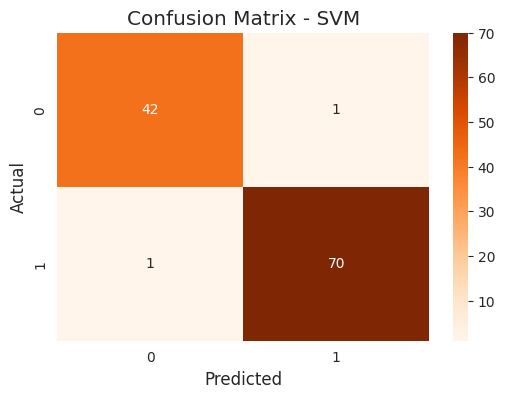

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [29]:
# Membuat dan melatih model SVM dengan kernel linear
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set pengujian
y_pred_svm = svm_model.predict(X_test_scaled)

# Membuat confusion matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix untuk SVM
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report untuk SVM
report_svm = classification_report(y_test, y_pred_svm)
print('Classification Report - SVM:')
print(report_svm)

Confusion Matrix:
- True Positives (TP): Model berhasil mengklasifikasikan 70 kasus kanker jinak dengan benar.
- True Negatives (TN): Model berhasil mengklasifikasikan 42 kasus kanker ganas dengan benar.
- False Positives (FP): Sebanyak 1 kasus kanker ganas salah diklasifikasikan sebagai kanker jinak.
- False Negatives (FN): Sebanyak 1 kasus kanker jinak salah diklasifikasikan sebagai kanker ganas.

Dari total 43 kasus kanker ganas (TN + FP = 42 + 1 = 43), model salah mengklasifikasikan 1 kasus sebagai kanker jinak (FP). Sementara itu, dari 71 kasus kanker jinak (FN + TP = 1 + 70 = 71), model salah mengklasifikasikan 1 kasus sebagai kanker ganas (FN).

Classification Report:

Precision: Mengukur tingkat ketepatan model dalam memprediksi kelas positif (kanker jinak).
- Untuk kelas 0 (kanker ganas), precision sebesar 0.98, yang berarti sekitar 98% dari kasus yang diprediksi sebagai kanker ganas memang benar kanker ganas.
- Untuk kelas 1 (kanker jinak), precision sebesar 0.99, yang berarti sekitar 99% dari kasus yang diprediksi sebagai kanker jinak memang benar kanker jinak.

Recall: Mengukur kemampuan model dalam mengidentifikasi dengan benar kasus kanker dalam dataset.
- Recall untuk kelas 0 (kanker ganas) sebesar 0.98, menunjukkan bahwa model mampu mengidentifikasi sekitar 98% dari seluruh kasus kanker ganas yang ada.
- Recall untuk kelas 1 (kanker jinak) sebesar 0.99, menunjukkan bahwa model mampu mengidentifikasi sekitar 99% dari seluruh kasus kanker jinak yang ada.

F1-score: Metrik yang menggabungkan precision dan recall menjadi satu angka yang mencerminkan keseimbangan antara keduanya.
- F1-score untuk kelas 0 adalah 0.98
- F1-score untuk kelas 1 adalah 0.99

Accuracy: Persentase keseluruhan dari prediksi yang benar dibandingkan dengan total jumlah data. Model ini memiliki akurasi sebesar 0.98, yang berarti model mampu memberikan prediksi yang benar sebanyak 98% dari seluruh dataset.

##**Naive Bayes**

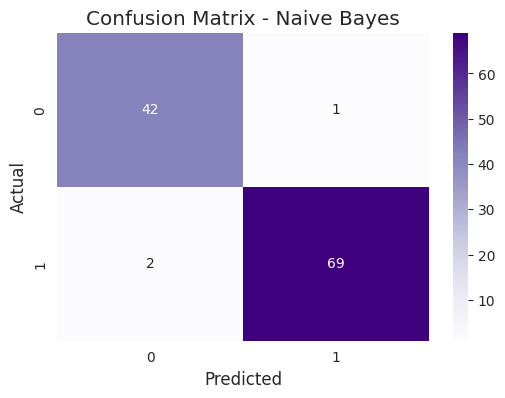

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [30]:
# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set pengujian
y_pred_nb = nb_model.predict(X_test_scaled)

# Membuat confusion matrix untuk Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix untuk Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report untuk Naive Bayes
report_nb = classification_report(y_test, y_pred_nb)
print('Classification Report - Naive Bayes:')
print(report_nb)

Confusion Matrix:
- True Positives (TP): Model berhasil mengklasifikasikan 69 kasus kanker jinak dengan benar.
- True Negatives (TN): Model berhasil mengklasifikasikan 42 kasus kanker ganas dengan benar.
- False Positives (FP): Sebanyak 1 kasus kanker ganas salah diklasifikasikan sebagai kanker jinak.
- False Negatives (FN): Sebanyak 2 kasus kanker jinak salah diklasifikasikan sebagai kanker ganas.

Dari total 43 kasus kanker ganas (TN + FP = 42 + 1 = 43), model salah mengklasifikasikan 1 kasus sebagai kanker jinak (FP). Sementara itu, dari 71 kasus kanker jinak (FN + TP = 2 + 69 = 71), model salah mengklasifikasikan 2 kasus sebagai kanker ganas (FN).

Classification Report:

Precision: Mengukur tingkat ketepatan model dalam memprediksi kelas positif (kanker jinak).
- Untuk kelas 0 (kanker ganas), precision sebesar 0.95, yang berarti sekitar 95% dari kasus yang diprediksi sebagai kanker ganas memang benar kanker ganas.
- Untuk kelas 1 (kanker jinak), precision sebesar 0.99, yang berarti sekitar 99% dari kasus yang diprediksi sebagai kanker jinak memang benar kanker jinak.

Recall: Mengukur kemampuan model dalam mengidentifikasi dengan benar kasus kanker dalam dataset.
- Recall untuk kelas 0 (kanker ganas) sebesar 0.98, menunjukkan bahwa model mampu mengidentifikasi sekitar 98% dari seluruh kasus kanker ganas yang ada.
- Recall untuk kelas 1 (kanker jinak) sebesar 0.97, menunjukkan bahwa model mampu mengidentifikasi sekitar 97% dari seluruh kasus kanker jinak yang ada.

F1-score: Metrik yang menggabungkan precision dan recall menjadi satu angka yang mencerminkan keseimbangan antara keduanya.
- F1-score untuk kelas 0 adalah 0.97
- F1-score untuk kelas 1 adalah 0.98

Accuracy: Persentase keseluruhan dari prediksi yang benar dibandingkan dengan total jumlah data. Model ini memiliki akurasi sebesar 0.97, yang berarti model mampu memberikan prediksi yang benar sebanyak 97% dari seluruh dataset.

##**K-Nearest Neighbors**

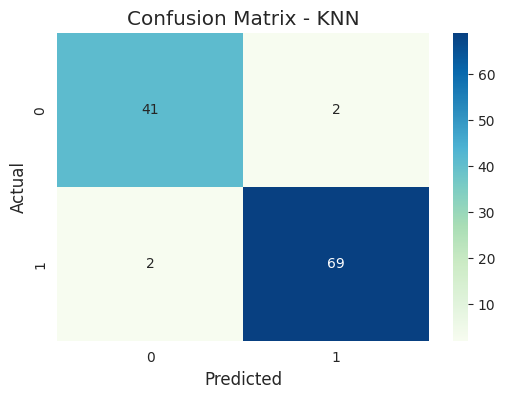

Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [32]:
# Membuat dan melatih model KNN (gunakan nilai k=5 sebagai default)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set pengujian
y_pred_knn = knn_model.predict(X_test_scaled)

# Membuat confusion matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix untuk KNN
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='GnBu')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat classification report untuk KNN
report_knn = classification_report(y_test, y_pred_knn)
print('Classification Report - KNN:')
print(report_knn)

Confusion Matrix:
- True Positives (TP): Model berhasil mengklasifikasikan 69 kasus kanker jinak dengan benar.
- True Negatives (TN): Model berhasil mengklasifikasikan 41 kasus kanker ganas dengan benar.
- False Positives (FP): Sebanyak 2 kasus kanker ganas salah diklasifikasikan sebagai kanker jinak.
- False Negatives (FN): Sebanyak 2 kasus kanker jinak salah diklasifikasikan sebagai kanker ganas.

Dari total 43 kasus kanker ganas (TN + FP = 41 + 2 = 43), model salah mengklasifikasikan 2 kasus sebagai kanker jinak (FP). Sementara itu, dari 71 kasus kanker jinak (FN + TP = 2 + 69 = 71), model salah mengklasifikasikan 2 kasus sebagai kanker ganas (FN).

Classification Report:

Precision: Mengukur tingkat ketepatan model dalam memprediksi kelas positif (kanker jinak).
- Untuk kelas 0 (kanker ganas), precision sebesar 0.95, yang berarti sekitar 95% dari kasus yang diprediksi sebagai kanker ganas memang benar kanker ganas.
- Untuk kelas 1 (kanker jinak), precision sebesar 0.97, yang berarti sekitar 97% dari kasus yang diprediksi sebagai kanker jinak memang benar kanker jinak.

Recall: Mengukur kemampuan model dalam mengidentifikasi dengan benar kasus kanker dalam dataset.
- Recall untuk kelas 0 (kanker ganas) sebesar 0.95, menunjukkan bahwa model mampu mengidentifikasi sekitar 95% dari seluruh kasus kanker ganas yang ada.
- Recall untuk kelas 1 (kanker jinak) sebesar 0.97, menunjukkan bahwa model mampu mengidentifikasi sekitar 97% dari seluruh kasus kanker jinak yang ada.

F1-score: Metrik yang menggabungkan precision dan recall menjadi satu angka yang mencerminkan keseimbangan antara keduanya.
- F1-score untuk kelas 0 adalah 0.95
- F1-score untuk kelas 1 adalah 0.97

Accuracy: Persentase keseluruhan dari prediksi yang benar dibandingkan dengan total jumlah data. Model ini memiliki akurasi sebesar 0.96, yang berarti model mampu memberikan prediksi yang benar sebanyak 96% dari seluruh dataset.

##**Perbandingan Hasil Model**

In [35]:
# Dictionary model yang sudah digunakan
models = {
    "Logistic Regression": model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "Naive Bayes": nb_model,
    "KNN": knn_model
}

# DataFrame untuk menyimpan hasil evaluasi model
results = []

# Loop melalui setiap model dan ambil metrik evaluasi
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append([
        name,
        round(report["accuracy"], 4),
        round(report["macro avg"]["precision"], 4),
        round(report["macro avg"]["recall"], 4),
        round(report["macro avg"]["f1-score"], 4)
    ])

# Membuat DataFrame hasil evaluasi
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Menampilkan tabel hasil perbandingan model
print("\n=== Perbandingan Hasil Model ===")
results_df


=== Perbandingan Hasil Model ===


Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9649     0.9627  0.9627    0.9627
1        Decision Tree    0.9123     0.9066  0.9066    0.9066
2        Random Forest    0.9561     0.9554  0.9510    0.9531
3                  SVM    0.9825     0.9813  0.9813    0.9813
4          Naive Bayes    0.9737     0.9701  0.9743    0.9721
5                  KNN    0.9649     0.9627  0.9627    0.9627

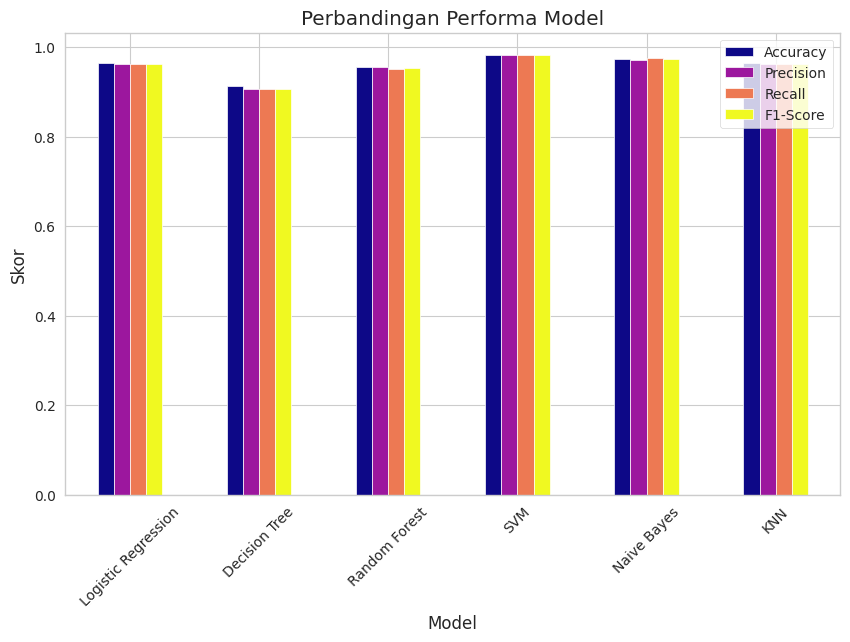

In [36]:
# Plot bar chart hasil perbandingan
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="plasma")
plt.title("Perbandingan Performa Model")
plt.xlabel("Model")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()

# Kesimpulan
Berdasarkan hasil analisis, diketahui bahwa distribusi label target tidak seimbang. Oleh karena itu, dalam menentukan model klasifikasi terbaik, kita perlu mempertimbangkan nilai Precision dan Recall. Dari enam model machine learning yang diuji, Support Vector Machine (SVM) terbukti menjadi metode terbaik untuk mengklasifikasikan kasus kanker payudara, dengan nilai Precision dan Recall sebesar 0.9813.
Hasil evaluasi menunjukkan bahwa dari 43 kasus kanker ganas (42 benar terdeteksi sebagai ganas dan 1 salah terklasifikasi sebagai jinak), model hanya membuat 1 kesalahan klasifikasi. Sementara itu, dari 71 kasus kanker jinak (70 benar terdeteksi sebagai jinak dan 1 salah terklasifikasi sebagai ganas), model juga hanya melakukan 1 kesalahan. Hal ini membuktikan bahwa model SVM memiliki tingkat akurasi yang sangat baik dalam mendeteksi kedua jenis kanker dengan kesalahan minimal.



